# 📊 Análisis Exploratorio de Datos (EDA)
## Proyecto Final - MLOps con CRISP-DM

**Fase 2: Comprensión de los Datos**

Este notebook contiene el análisis exploratorio completo del dataset sintético de llamadas de call center para predicción de abandono de clientes.


## 1. Importación de Librerías


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pathlib import Path
import os

warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# Configuración de pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

print("✅ Librerías importadas correctamente")


✅ Librerías importadas correctamente


## 2. Carga de Datos


In [4]:
# Obtener ruta del proyecto (navegar hacia arriba desde notebooks/)
project_root = Path.cwd().parent
data_path = project_root / "data" / "synthetic" / "synthetic_calls.csv"

# Verificar que el archivo existe
if not data_path.exists():
    print(f"⚠️ Archivo no encontrado en: {data_path}")
    print(f"📁 Directorio actual: {Path.cwd()}")
    print(f"📁 Raíz del proyecto: {project_root}")
    print(f"🔍 Buscando archivo...")
    # Intentar buscar el archivo
    possible_paths = [
        project_root / "data" / "synthetic" / "synthetic_calls.csv",
        Path.cwd() / "data" / "synthetic" / "synthetic_calls.csv",
        Path.cwd().parent / "data" / "synthetic" / "synthetic_calls.csv"
    ]
    for path in possible_paths:
        if path.exists():
            data_path = path
            print(f"✅ Archivo encontrado en: {data_path}")
            break
else:
    print(f"✅ Archivo encontrado en: {data_path}")

# Cargar datos
df = pd.read_csv(data_path)

print(f"\n✅ Datos cargados exitosamente")
print(f"📊 Dimensiones del dataset: {df.shape[0]:,} filas × {df.shape[1]} columnas")


✅ Archivo encontrado en: c:\Users\eduar\Desktop\Eduardo\uvg\mlo\MLOPS-Final-Proyect\data\synthetic\synthetic_calls.csv

✅ Datos cargados exitosamente
📊 Dimensiones del dataset: 30,000 filas × 24 columnas


## 3. Exploración Inicial


In [5]:
# Primeras filas
print("\n📋 Primeras 5 filas del dataset:")
df.head()



📋 Primeras 5 filas del dataset:


,customer_id,edad,ingreso_mensual,region,saldo_mora,dias_mora,dias_ultimo_pago,ultimo_pago,intentos_previos,wait_time_seconds,call_center_load,product_type,segmento_riesgo,iv_menu,score_crediticio,canal_contacto,call_time,hora_llamada,fecha_creacion,educacion,historial_pagos,timezone,campaña,abandono
0,1,47,1107.34,Sur,6801.17,265,277,1058.10,2,54.00,0.72,Hipoteca,Medio,Acuerdo,710.39,Email,2024-04-03,23,2025/08/23,Secundaria,Bueno,GMT-6,C,0
1,2,40,1759.01,Oriente,7551.68,346,382,2476.11,3,415.60,0.60,Credito_Personal,Alto,Pago,613.27,App,2024-07-02,16,2025/08/26,Universitaria,Bueno,GMT-7,C,0
2,3,49,2222.72,Oriente,6513.50,224,199,7306.42,2,27.80,0.59,Tarjeta,Medio,Acuerdo,617.72,WhatsApp,2024-03-09,1,05/31/2024,Universitaria,Malo,GMT-5,B,0
3,4,60,3212.60,Centro,1592.06,271,327,3460.64,1,130.10,0.59,Credito_Personal,Alto,Otros,762.11,Llamada,2024-10-11,16,22-11-2025,Postgrado,Excelente,GMT-5,D,1
4,5,39,4974.51,Norte,5938.06,187,372,5251.62,1,78.10,0.91,Pyme,Medio,Consulta,527.99,WhatsApp,2024-11-24,2,15-07-2024,Secundaria,Bueno,GMT-6,B,1


In [6]:
# Información general del dataset
print("\n📊 Información general del dataset:")
df.info()



📊 Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        30000 non-null  int64  
 1   edad               30000 non-null  int64  
 2   ingreso_mensual    28500 non-null  float64
 3   region             30000 non-null  object 
 4   saldo_mora         30000 non-null  float64
 5   dias_mora          30000 non-null  int64  
 6   dias_ultimo_pago   30000 non-null  int64  
 7   ultimo_pago        30000 non-null  float64
 8   intentos_previos   30000 non-null  int64  
 9   wait_time_seconds  30000 non-null  float64
 10  call_center_load   30000 non-null  float64
 11  product_type       30000 non-null  object 
 12  segmento_riesgo    30000 non-null  object 
 13  iv_menu            30000 non-null  object 
 14  score_crediticio   28500 non-null  float64
 15  canal_contacto     30000 non-null 

In [7]:
# Tipos de datos
print("\n🔢 Tipos de datos por columna:")
print(df.dtypes.value_counts())
print("\n📋 Detalle por columna:")
for col in df.columns:
    print(f"  {col:25s} → {str(df[col].dtype):15s} ({df[col].nunique()} valores únicos)")



🔢 Tipos de datos por columna:
object     11
int64       7
float64     6
Name: count, dtype: int64

📋 Detalle por columna:
  customer_id               → int64           (30000 valores únicos)
  edad                      → int64           (68 valores únicos)
  ingreso_mensual           → float64         (27734 valores únicos)
  region                    → object          (5 valores únicos)
  saldo_mora                → float64         (29640 valores únicos)
  dias_mora                 → int64           (366 valores únicos)
  dias_ultimo_pago          → int64           (400 valores únicos)
  ultimo_pago               → float64         (28858 valores únicos)
  intentos_previos          → int64           (11 valores únicos)
  wait_time_seconds         → float64         (4643 valores únicos)
  call_center_load          → float64         (99 valores únicos)
  product_type              → object          (5 valores únicos)
  segmento_riesgo           → object          (3 valores únicos)
  iv_m

## 4. Estadísticas Descriptivas


In [8]:
# Estadísticas descriptivas para variables numéricas
print("\n📈 Estadísticas descriptivas - Variables Numéricas:")
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
df[numeric_cols].describe().T



📈 Estadísticas descriptivas - Variables Numéricas:


,count,mean,std,min,25%,50%,75%,max
customer_id,30000.00,15000.50,8660.40,1.00,7500.75,15000.50,22500.25,30000.00
edad,30000.00,41.61,11.72,18.00,33.00,42.00,50.00,85.00
ingreso_mensual,28500.00,3381.20,1795.23,319.64,2119.02,2987.72,4199.68,19393.43
saldo_mora,30000.00,5996.03,5993.52,0.17,1708.46,4142.90,8331.26,56699.41
dias_mora,30000.00,181.58,105.27,-1.00,91.00,182.00,272.00,364.00
dias_ultimo_pago,30000.00,200.65,115.62,0.00,101.00,201.00,301.00,399.00
ultimo_pago,30000.00,1998.89,1996.47,0.01,572.40,1391.32,2770.30,21568.64
intentos_previos,30000.00,2.01,1.42,0.00,1.00,2.00,3.00,10.00
wait_time_seconds,30000.00,124.01,134.65,0.00,35.60,84.40,168.70,2736.40
call_center_load,30000.00,0.69,0.19,0.00,0.56,0.70,0.83,1.00


In [9]:
# Estadísticas para variables categóricas
print("\n📊 Estadísticas descriptivas - Variables Categóricas:")
categorical_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()

for col in categorical_cols:
    print(f"\n🔤 {col}:")
    print(df[col].value_counts().head(10))
    print(f"   Total valores únicos: {df[col].nunique()}")



📊 Estadísticas descriptivas - Variables Categóricas:

🔤 region:
region
Centro       11930
Norte         6094
Occidente     4541
Sur           4501
Oriente       2934
Name: count, dtype: int64
   Total valores únicos: 5

🔤 product_type:
product_type
Credito_Personal    10518
Tarjeta              8919
Hipoteca             4569
Automotriz           3040
Pyme                 2954
Name: count, dtype: int64
   Total valores únicos: 5

🔤 segmento_riesgo:
segmento_riesgo
Medio    15046
Alto      9046
Bajo      5908
Name: count, dtype: int64
   Total valores únicos: 3

🔤 iv_menu:
iv_menu
Acuerdo     7573
Pago        7571
Consulta    7458
Otros       7398
Name: count, dtype: int64
   Total valores únicos: 4

🔤 canal_contacto:
canal_contacto
Llamada     14936
WhatsApp     7497
Email        4576
App          2961
???            30
Name: count, dtype: int64
   Total valores únicos: 5

🔤 call_time:
call_time
2024-12-22    110
2024-07-30    104
2024-06-26    104
2024-07-11    104
2024-09-23    104
2

## 5. Análisis de Valores Faltantes



⚠️ Columnas con valores faltantes:
         Columna  Valores Faltantes  Porcentaje (%)
 ingreso_mensual               1500            5.00
score_crediticio               1500            5.00
 historial_pagos               1500            5.00


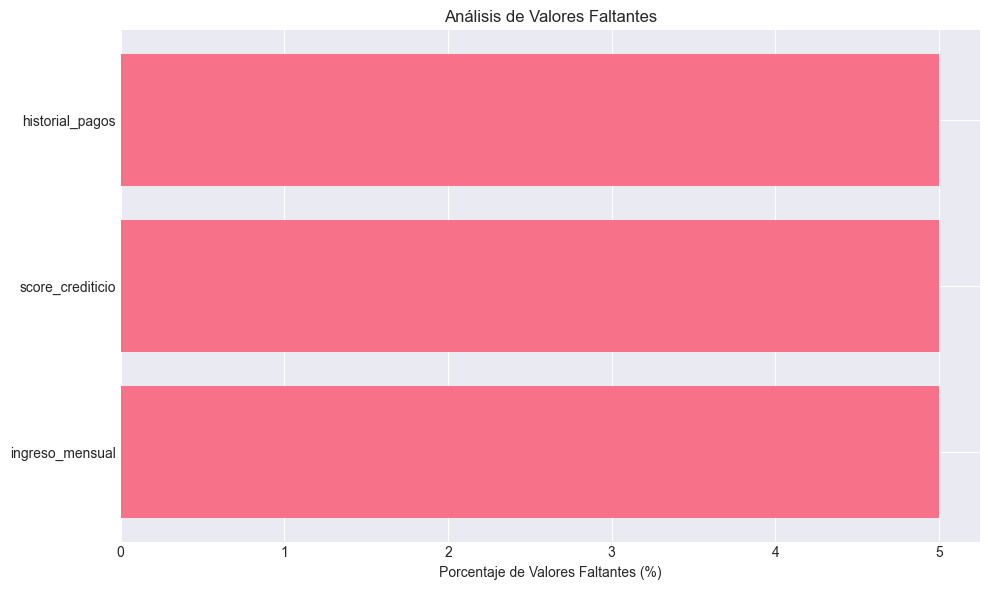

In [10]:
# Valores faltantes
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100

missing_df = pd.DataFrame({
    'Columna': missing_data.index,
    'Valores Faltantes': missing_data.values,
    'Porcentaje (%)': missing_percent.values
})

missing_df = missing_df[missing_df['Valores Faltantes'] > 0].sort_values('Porcentaje (%)', ascending=False)

if len(missing_df) > 0:
    print("\n⚠️ Columnas con valores faltantes:")
    print(missing_df.to_string(index=False))
    
    # Visualización
    plt.figure(figsize=(10, 6))
    plt.barh(missing_df['Columna'], missing_df['Porcentaje (%)'])
    plt.xlabel('Porcentaje de Valores Faltantes (%)')
    plt.title('Análisis de Valores Faltantes')
    plt.tight_layout()
    plt.show()
else:
    print("\n✅ No se encontraron valores faltantes en el dataset")


## 6. Análisis de la Variable Target (Abandono)



🎯 Distribución de la Variable Target (Abandono):

  Clase 0 (No Abandono): 15,026 registros (50.09%)
  Clase 1 (Abandono):     14,974 registros (49.91%)

  Balance: ✅ Balanceado


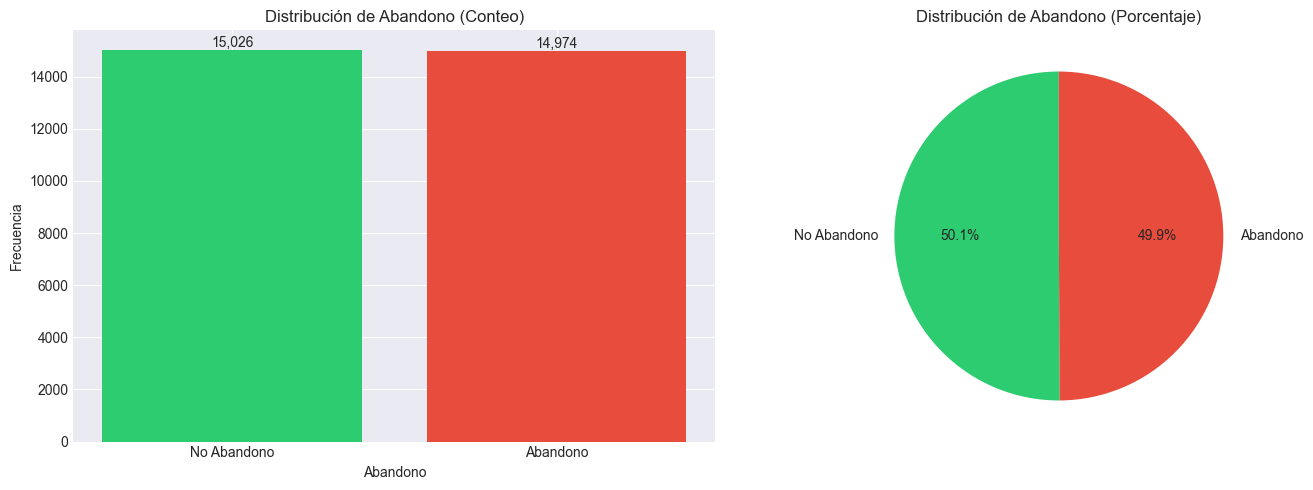

In [11]:
# Distribución de la variable target
target_counts = df['abandono'].value_counts()
target_percent = df['abandono'].value_counts(normalize=True) * 100

print("\n🎯 Distribución de la Variable Target (Abandono):")
print(f"\n  Clase 0 (No Abandono): {target_counts[0]:,} registros ({target_percent[0]:.2f}%)")
print(f"  Clase 1 (Abandono):     {target_counts[1]:,} registros ({target_percent[1]:.2f}%)")
print(f"\n  Balance: {'✅ Balanceado' if abs(target_percent[0] - target_percent[1]) < 20 else '⚠️ Desbalanceado'}")

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].bar(target_counts.index, target_counts.values, color=['#2ecc71', '#e74c3c'])
axes[0].set_xlabel('Abandono')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title('Distribución de Abandono (Conteo)')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['No Abandono', 'Abandono'])

for i, v in enumerate(target_counts.values):
    axes[0].text(i, v, f'{v:,}', ha='center', va='bottom')

axes[1].pie(target_counts.values, labels=['No Abandono', 'Abandono'], 
            autopct='%1.1f%%', colors=['#2ecc71', '#e74c3c'], startangle=90)
axes[1].set_title('Distribución de Abandono (Porcentaje)')

plt.tight_layout()
plt.show()


## 7. Análisis de Variables Numéricas


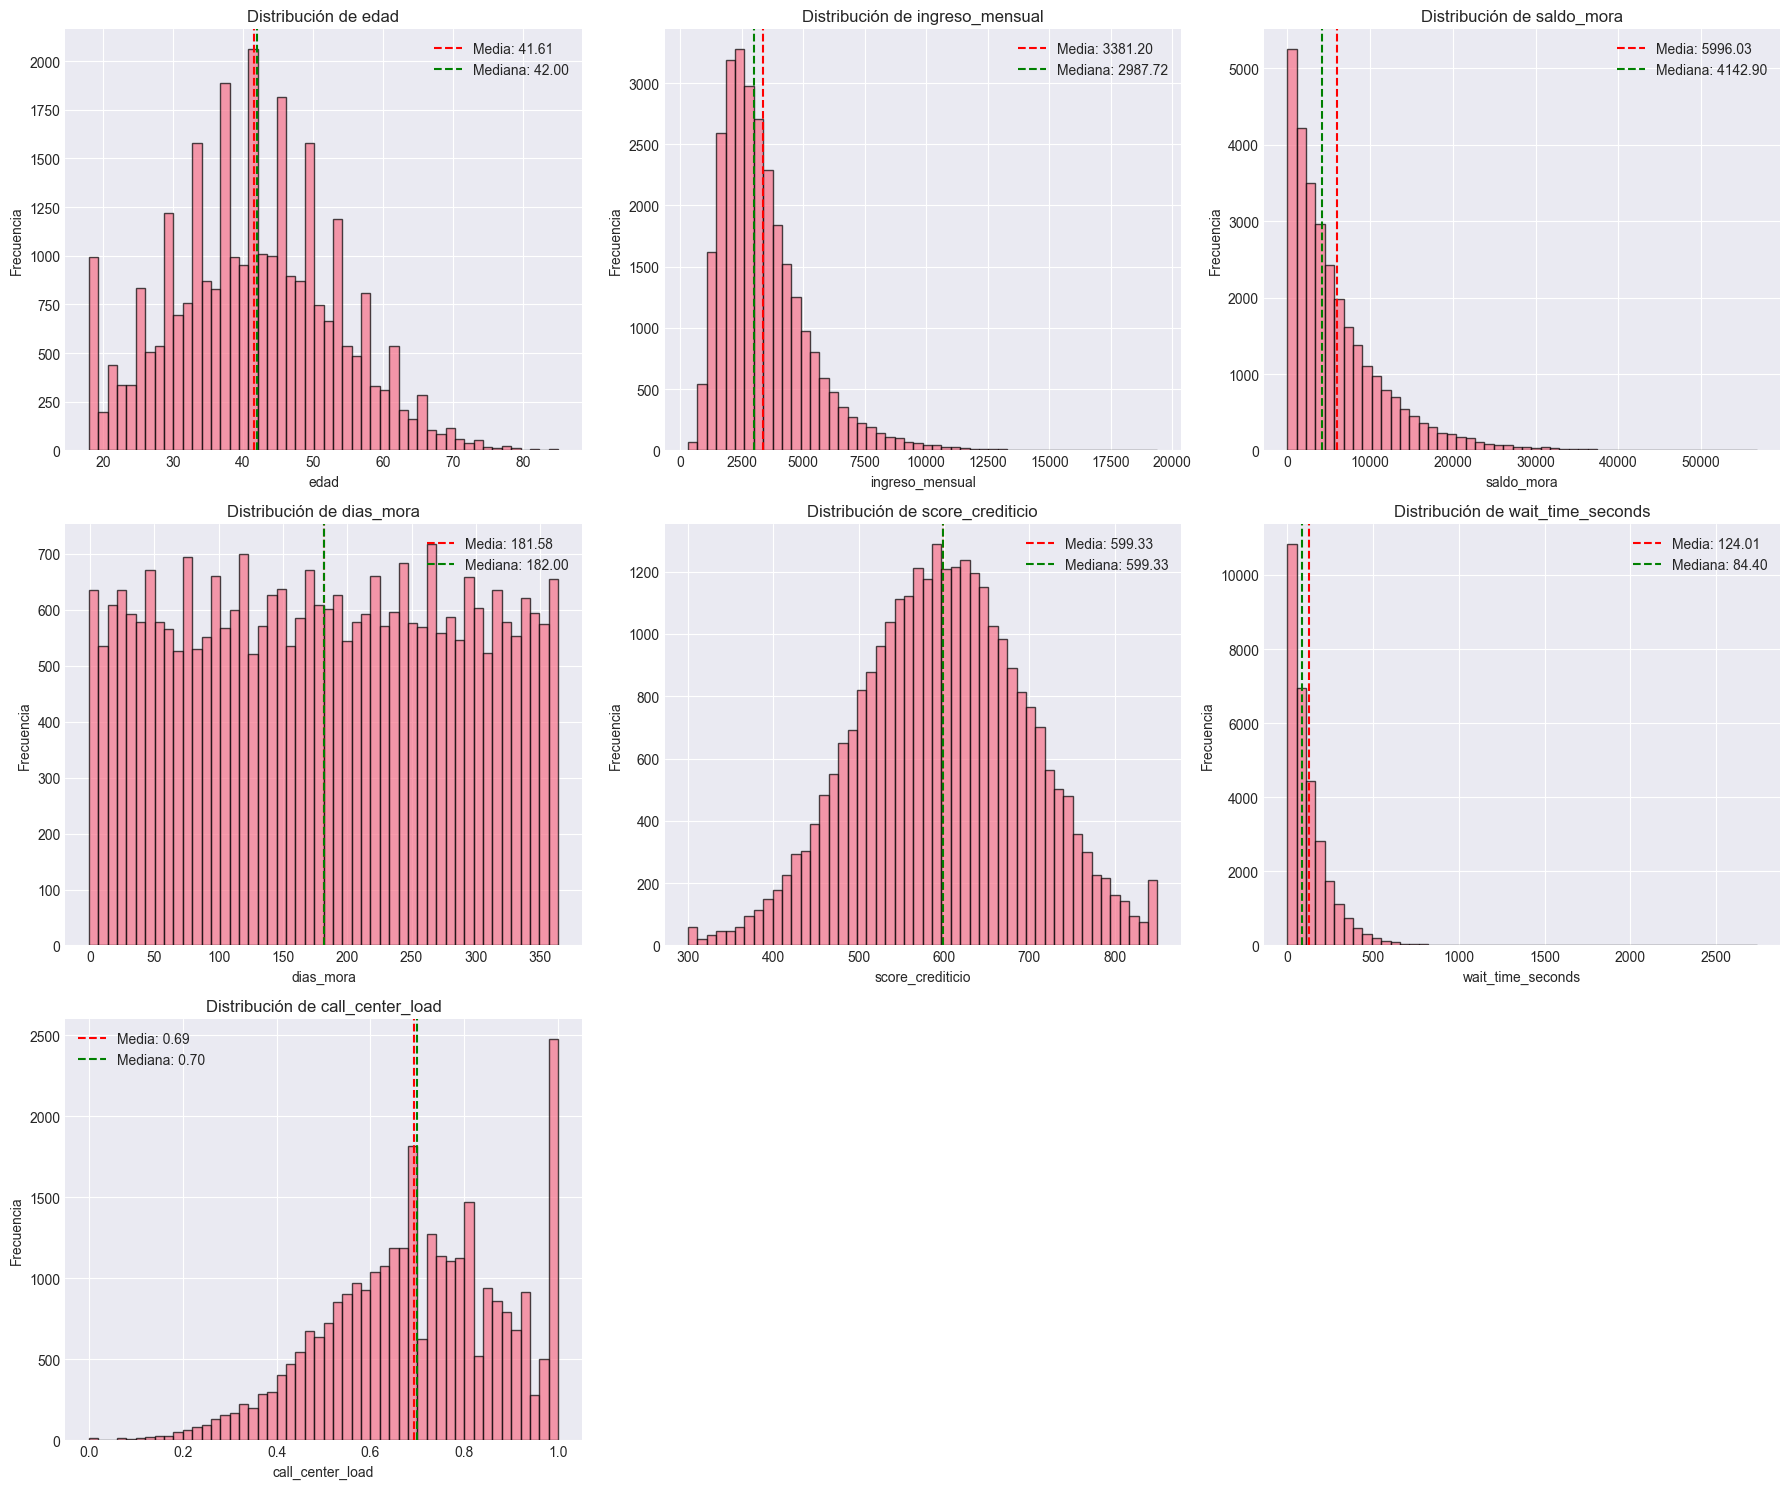

In [12]:
# Distribuciones de variables numéricas clave
key_numeric = ['edad', 'ingreso_mensual', 'saldo_mora', 'dias_mora', 
               'score_crediticio', 'wait_time_seconds', 'call_center_load']

key_numeric = [col for col in key_numeric if col in df.columns]

n_cols = 3
n_rows = (len(key_numeric) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5*n_rows))
axes = axes.flatten() if n_rows > 1 else [axes] if n_cols == 1 else axes

for idx, col in enumerate(key_numeric):
    axes[idx].hist(df[col].dropna(), bins=50, edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Distribución de {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frecuencia')
    axes[idx].axvline(df[col].mean(), color='red', linestyle='--', label=f'Media: {df[col].mean():.2f}')
    axes[idx].axvline(df[col].median(), color='green', linestyle='--', label=f'Mediana: {df[col].median():.2f}')
    axes[idx].legend()

# Ocultar ejes vacíos
for idx in range(len(key_numeric), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()


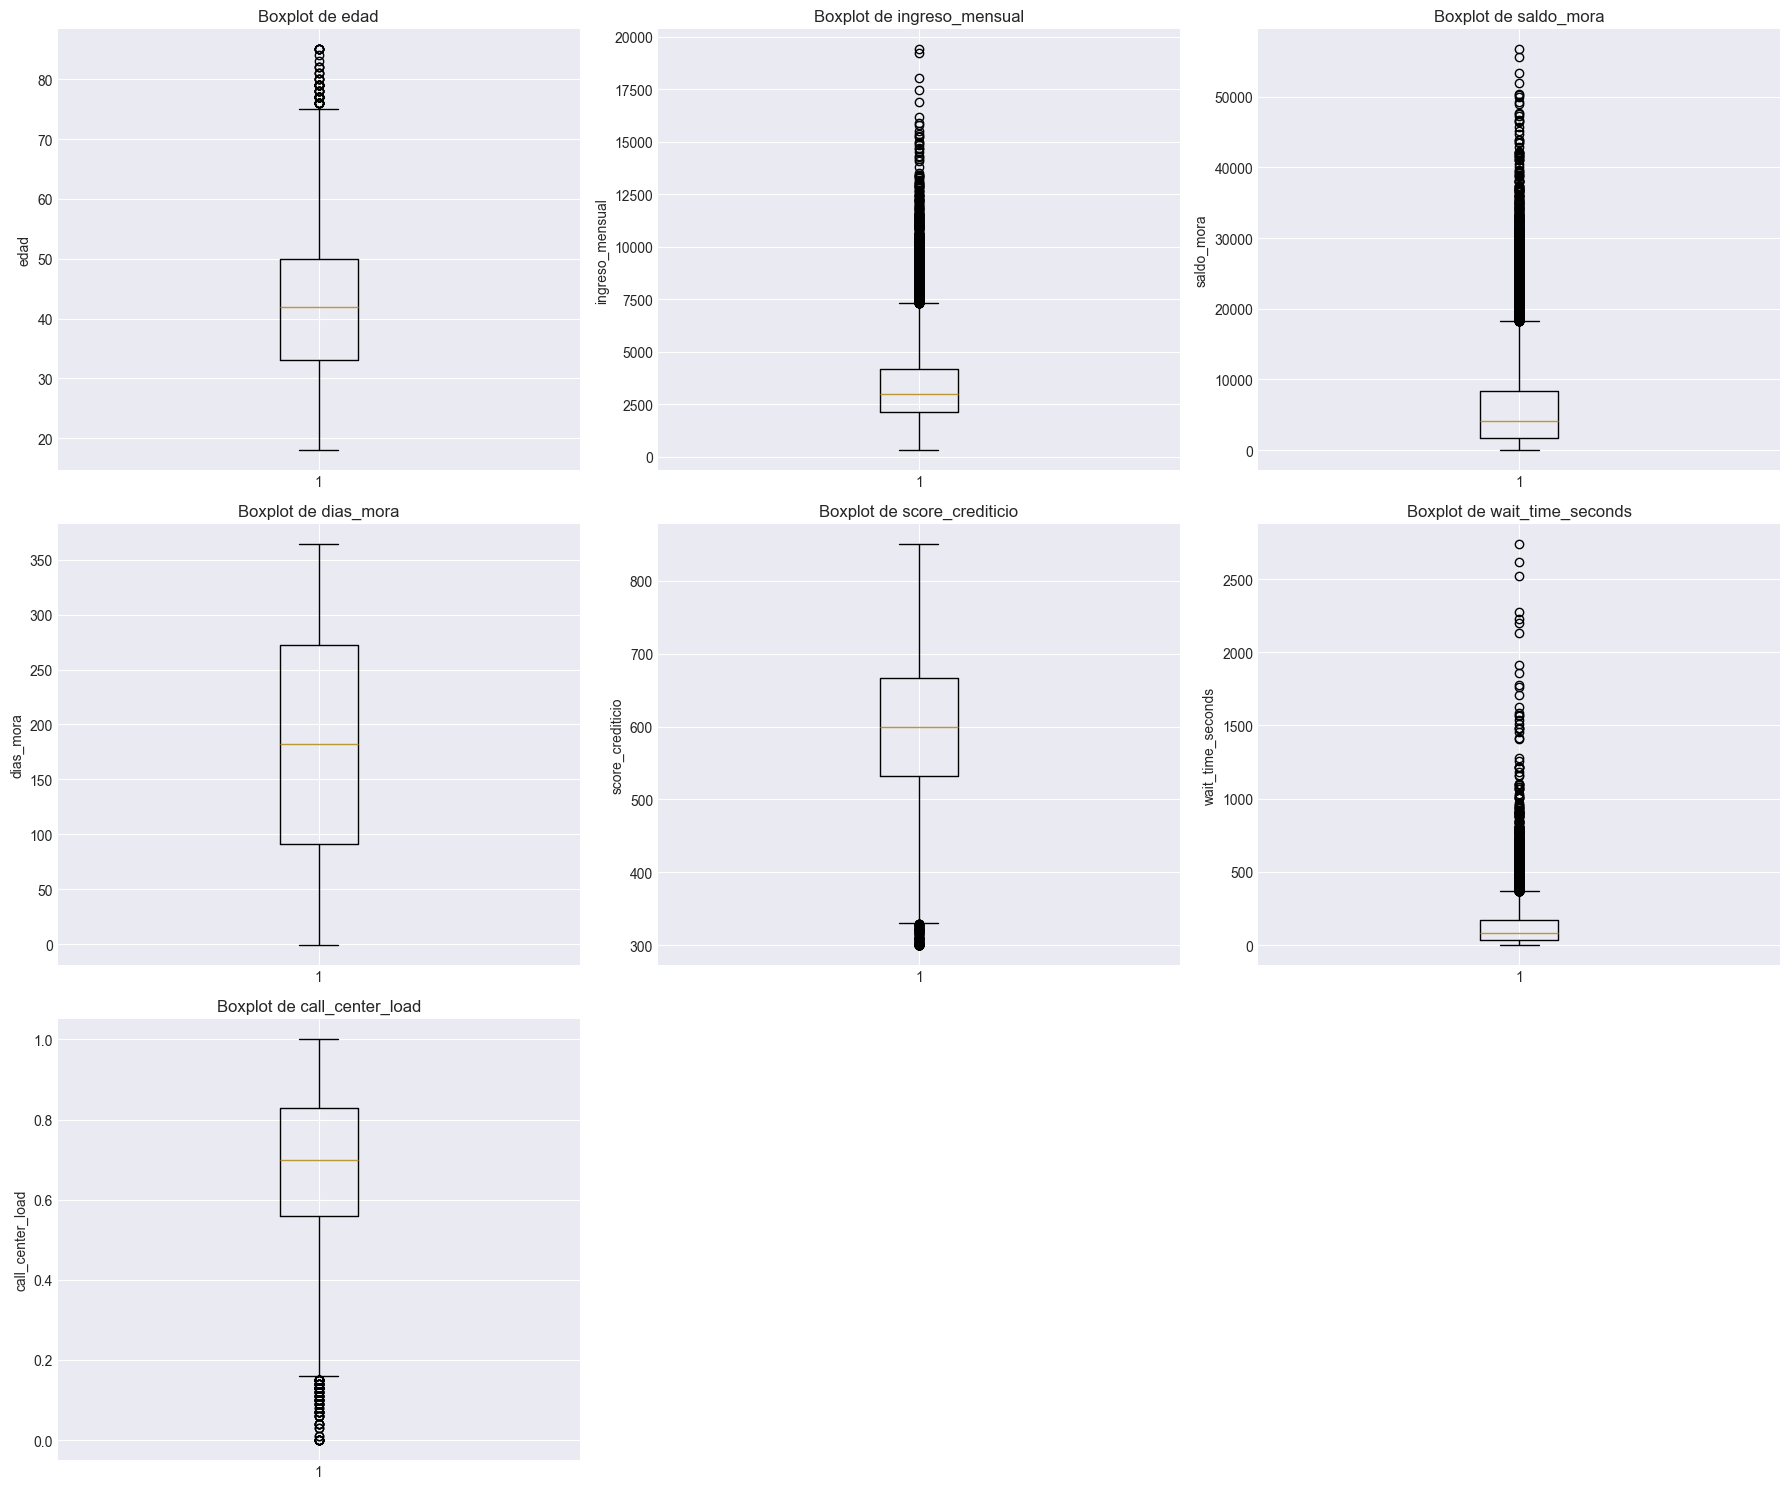

In [13]:
# Boxplots para detectar outliers
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5*n_rows))
axes = axes.flatten() if n_rows > 1 else [axes] if n_cols == 1 else axes

for idx, col in enumerate(key_numeric):
    axes[idx].boxplot(df[col].dropna(), vert=True)
    axes[idx].set_title(f'Boxplot de {col}')
    axes[idx].set_ylabel(col)

for idx in range(len(key_numeric), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()


## 8. Análisis de Variables Categóricas


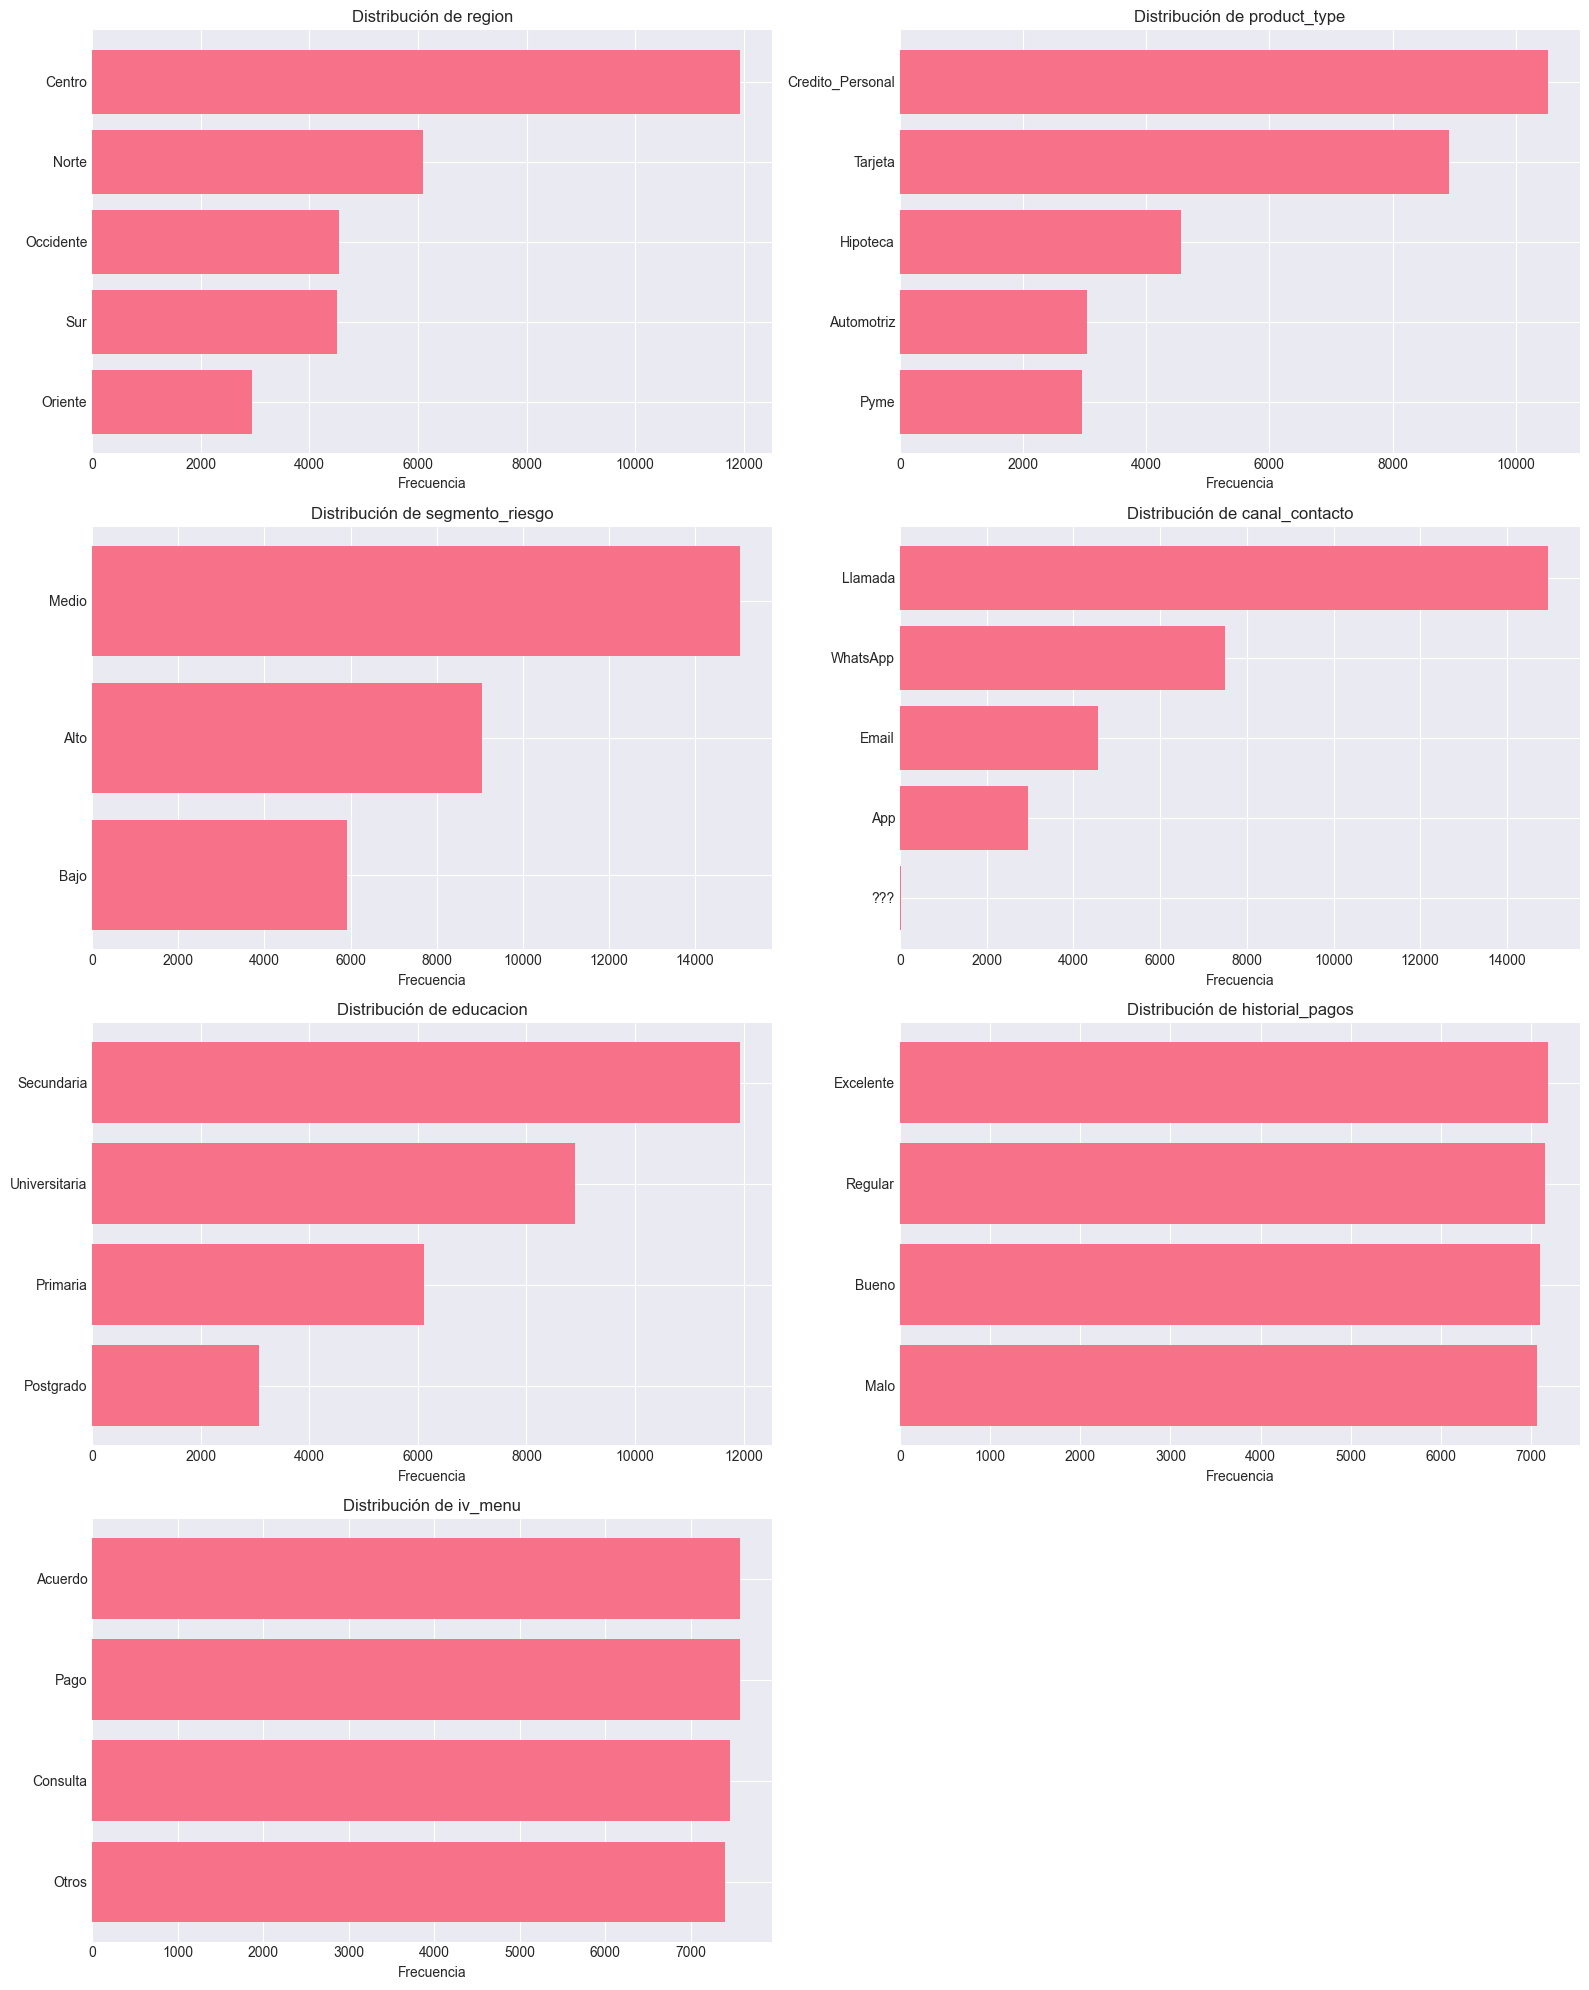

In [14]:
# Distribución de variables categóricas clave
key_categorical = ['region', 'product_type', 'segmento_riesgo', 'canal_contacto', 
                  'educacion', 'historial_pagos', 'iv_menu']

key_categorical = [col for col in key_categorical if col in df.columns]

n_cols = 2
n_rows = (len(key_categorical) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 5*n_rows))
axes = axes.flatten() if n_rows > 1 else [axes] if n_cols == 1 else axes

for idx, col in enumerate(key_categorical):
    value_counts = df[col].value_counts().head(10)
    axes[idx].barh(range(len(value_counts)), value_counts.values)
    axes[idx].set_yticks(range(len(value_counts)))
    axes[idx].set_yticklabels(value_counts.index)
    axes[idx].set_xlabel('Frecuencia')
    axes[idx].set_title(f'Distribución de {col}')
    axes[idx].invert_yaxis()

for idx in range(len(key_categorical), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()


## 9. Análisis de Correlaciones


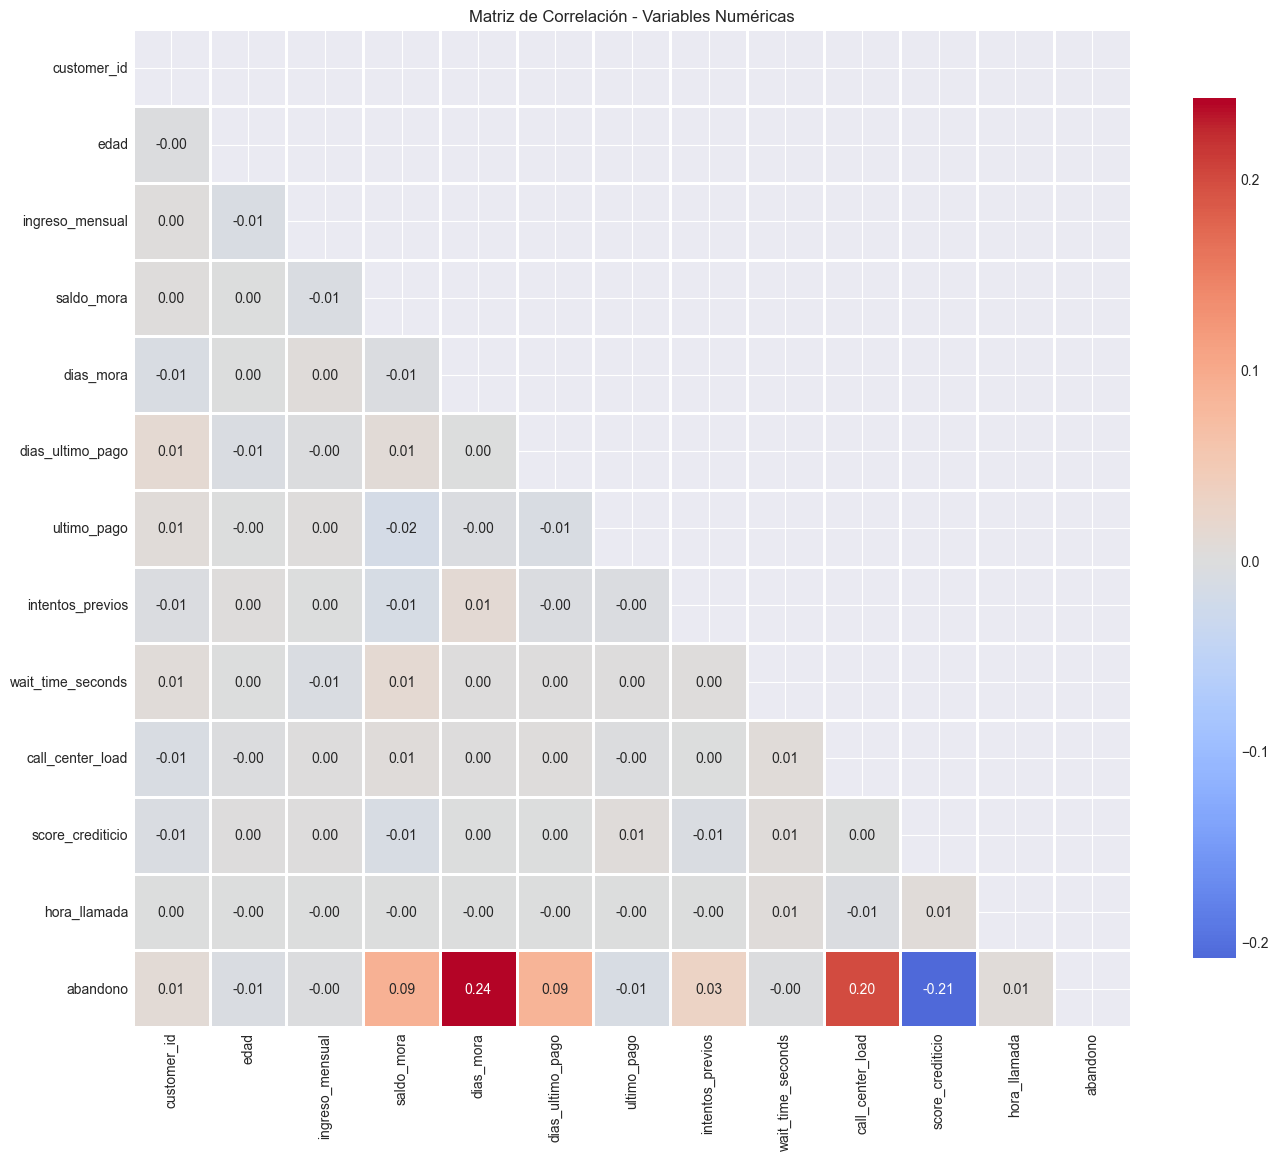

In [15]:
# Matriz de correlación para variables numéricas
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(14, 12))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f', 
            cmap='coolwarm', center=0, square=True, linewidths=1, cbar_kws={"shrink": .8})
plt.title('Matriz de Correlación - Variables Numéricas')
plt.tight_layout()
plt.show()



📊 Correlación de variables numéricas con Abandono:
abandono             1.00
dias_mora            0.24
call_center_load     0.20
saldo_mora           0.09
dias_ultimo_pago     0.09
intentos_previos     0.03
customer_id          0.01
hora_llamada         0.01
wait_time_seconds   -0.00
ingreso_mensual     -0.00
edad                -0.01
ultimo_pago         -0.01
score_crediticio    -0.21


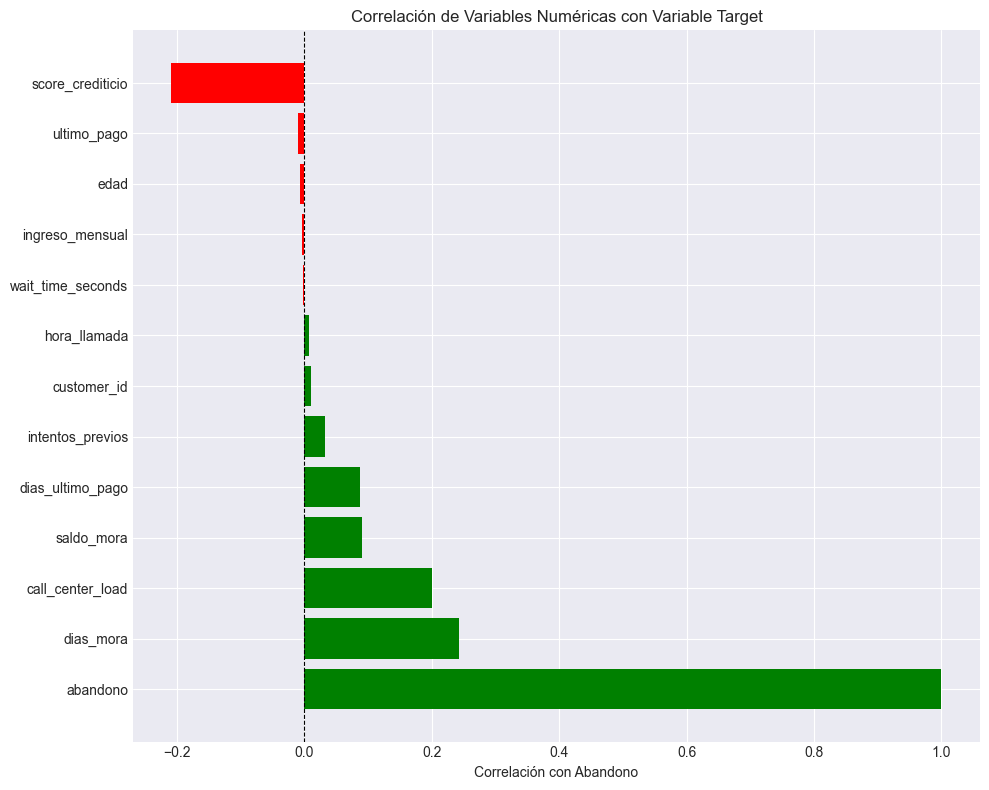

In [16]:
# Correlaciones con la variable target
target_corr = df[numeric_cols].corrwith(df['abandono']).sort_values(ascending=False)

print("\n📊 Correlación de variables numéricas con Abandono:")
print(target_corr.to_string())

# Visualización
plt.figure(figsize=(10, 8))
colors = ['red' if x < 0 else 'green' for x in target_corr.values]
plt.barh(range(len(target_corr)), target_corr.values, color=colors)
plt.yticks(range(len(target_corr)), target_corr.index)
plt.xlabel('Correlación con Abandono')
plt.title('Correlación de Variables Numéricas con Variable Target')
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
plt.tight_layout()
plt.show()


## 10. Análisis Bivariado: Target vs Variables


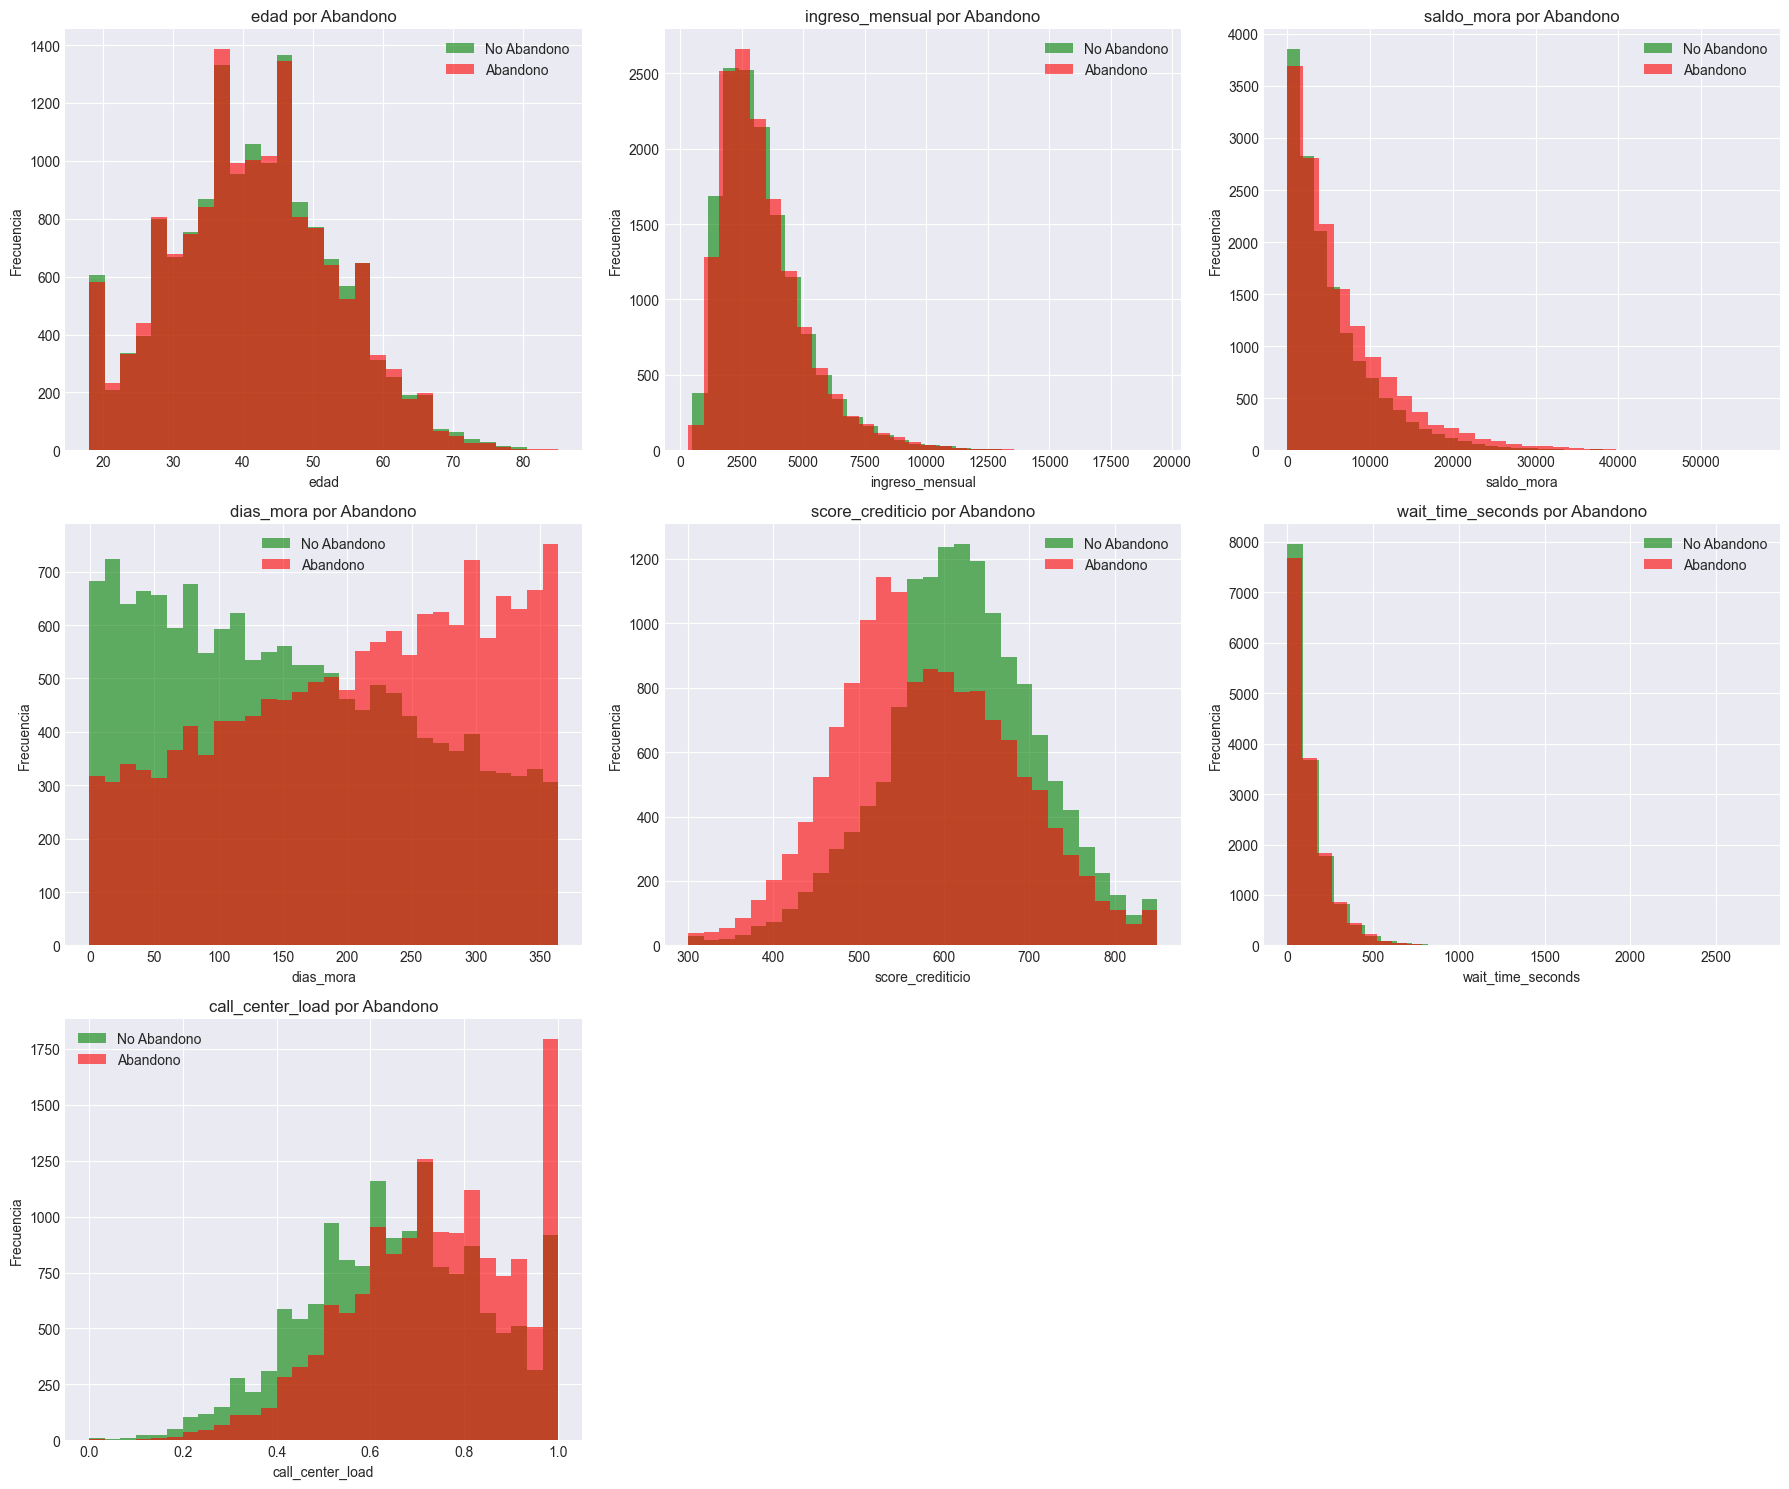

In [17]:
# Distribución de variables numéricas por target
n_cols = 3
n_rows = (len(key_numeric) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5*n_rows))
axes = axes.flatten() if n_rows > 1 else [axes] if n_cols == 1 else axes

for idx, col in enumerate(key_numeric):
    df_no_abandono = df[df['abandono'] == 0][col].dropna()
    df_abandono = df[df['abandono'] == 1][col].dropna()
    
    axes[idx].hist(df_no_abandono, bins=30, alpha=0.6, label='No Abandono', color='green')
    axes[idx].hist(df_abandono, bins=30, alpha=0.6, label='Abandono', color='red')
    axes[idx].set_title(f'{col} por Abandono')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frecuencia')
    axes[idx].legend()

for idx in range(len(key_numeric), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()


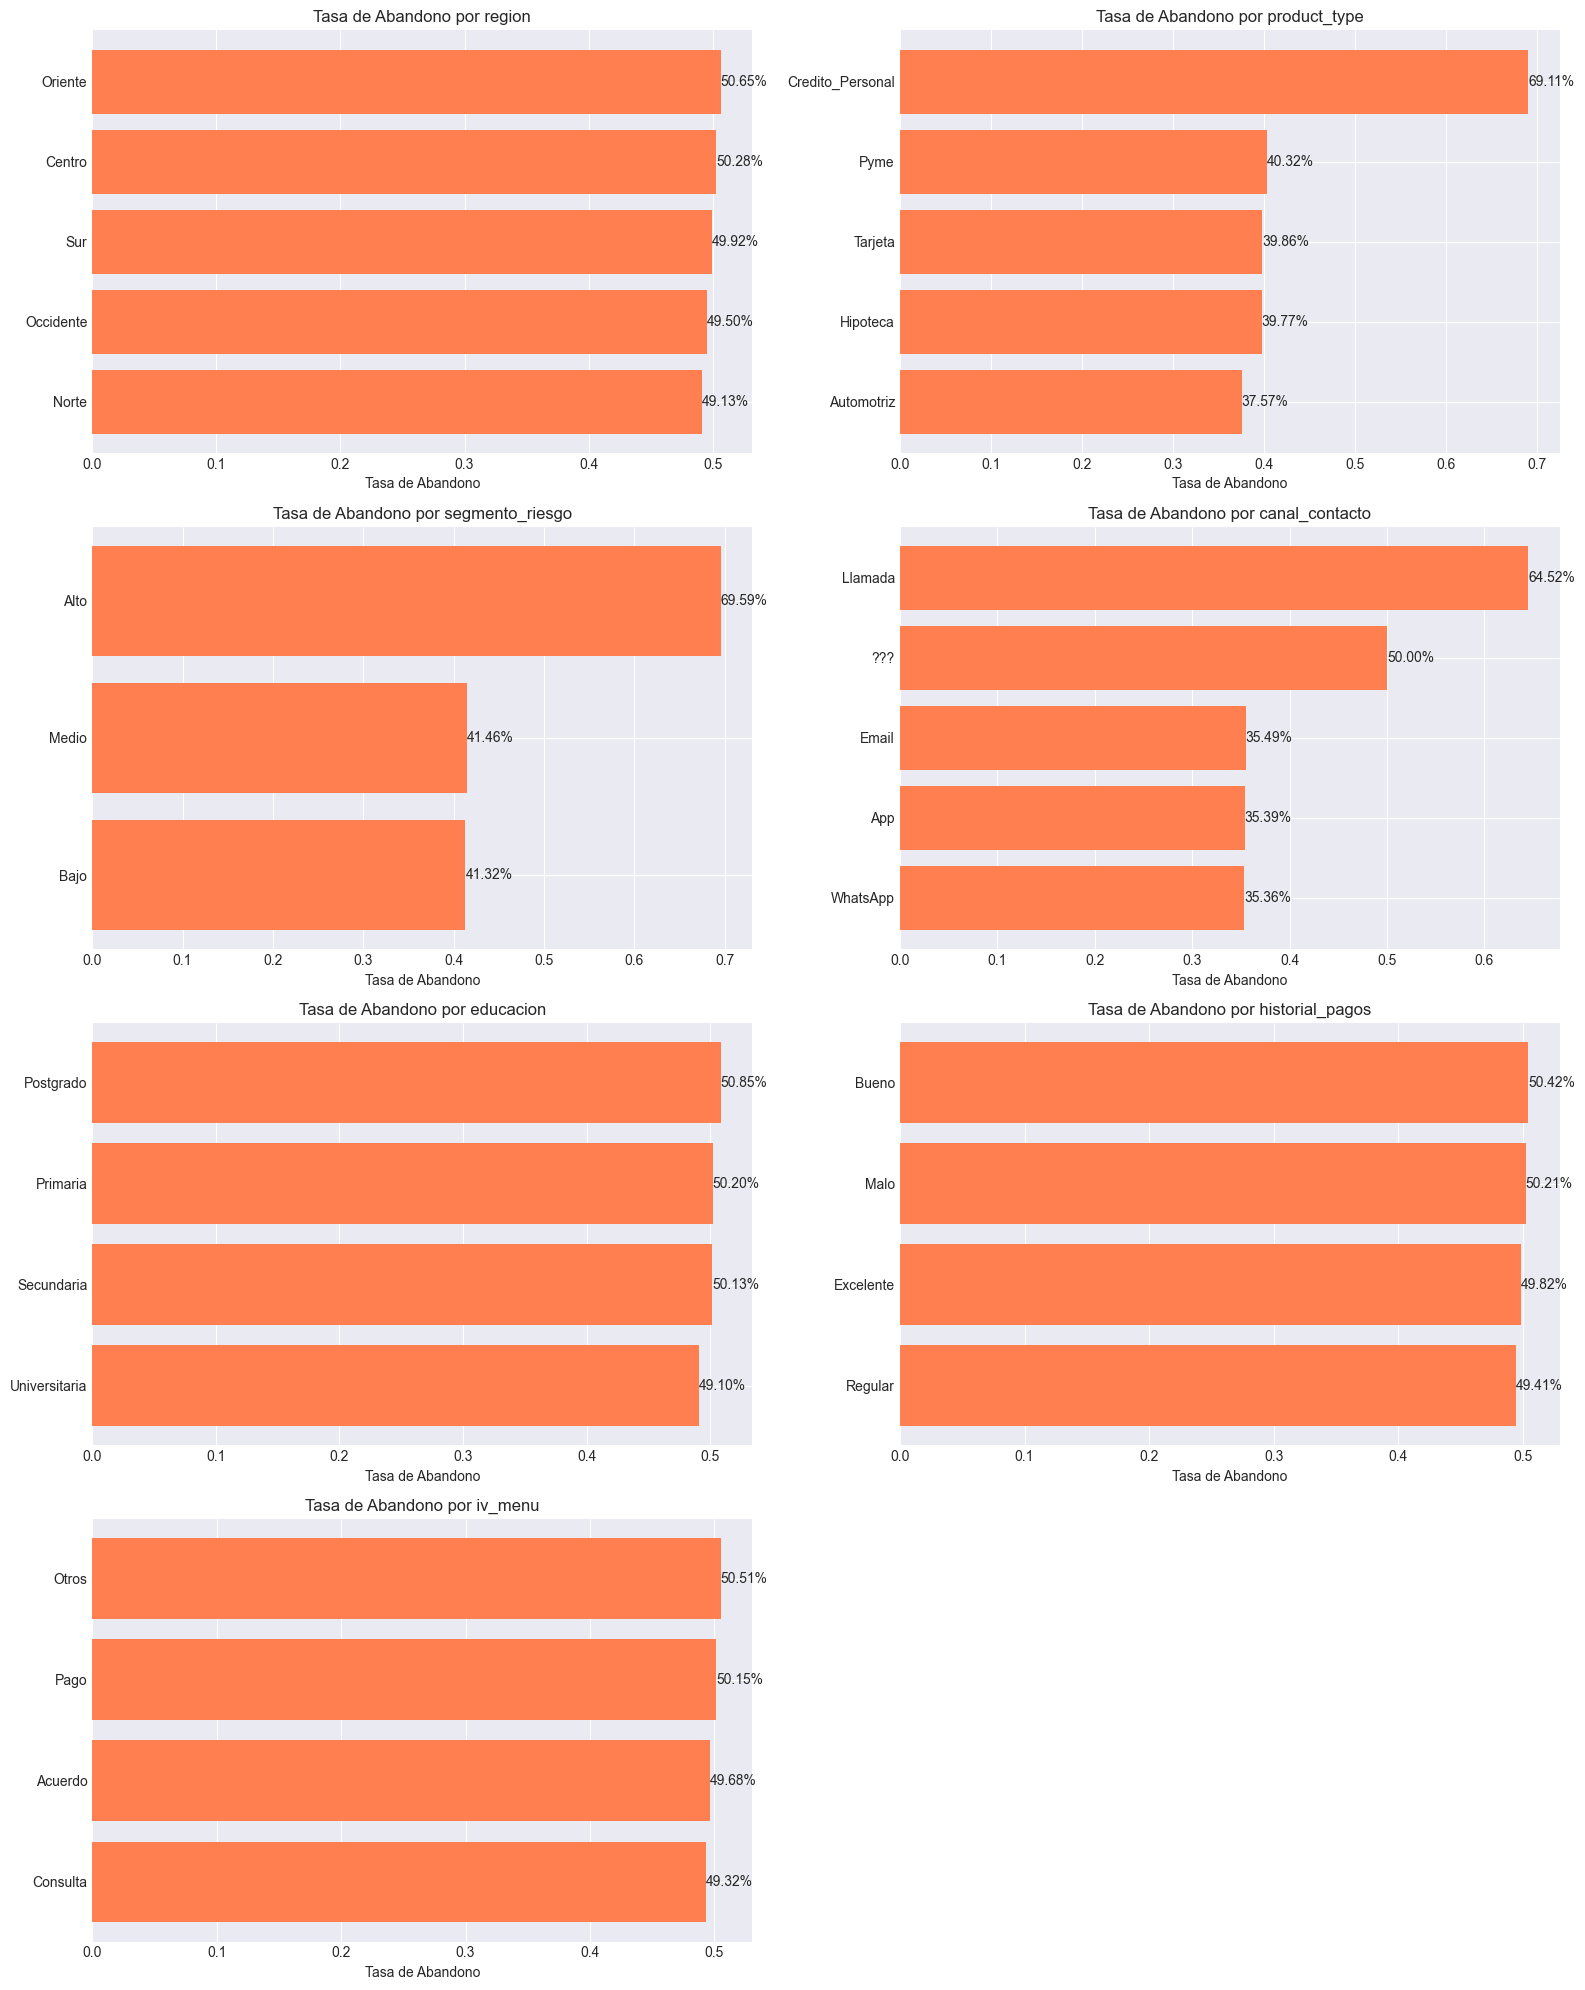

In [18]:
# Tasa de abandono por categorías
n_cols = 2
n_rows = (len(key_categorical) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 5*n_rows))
axes = axes.flatten() if n_rows > 1 else [axes] if n_cols == 1 else axes

for idx, col in enumerate(key_categorical):
    abandono_rate = df.groupby(col)['abandono'].mean().sort_values(ascending=False)
    
    axes[idx].barh(range(len(abandono_rate)), abandono_rate.values, color='coral')
    axes[idx].set_yticks(range(len(abandono_rate)))
    axes[idx].set_yticklabels(abandono_rate.index)
    axes[idx].set_xlabel('Tasa de Abandono')
    axes[idx].set_title(f'Tasa de Abandono por {col}')
    axes[idx].invert_yaxis()
    
    # Agregar valores en las barras
    for i, v in enumerate(abandono_rate.values):
        axes[idx].text(v, i, f'{v:.2%}', va='center')

for idx in range(len(key_categorical), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()


## 11. Análisis Temporal


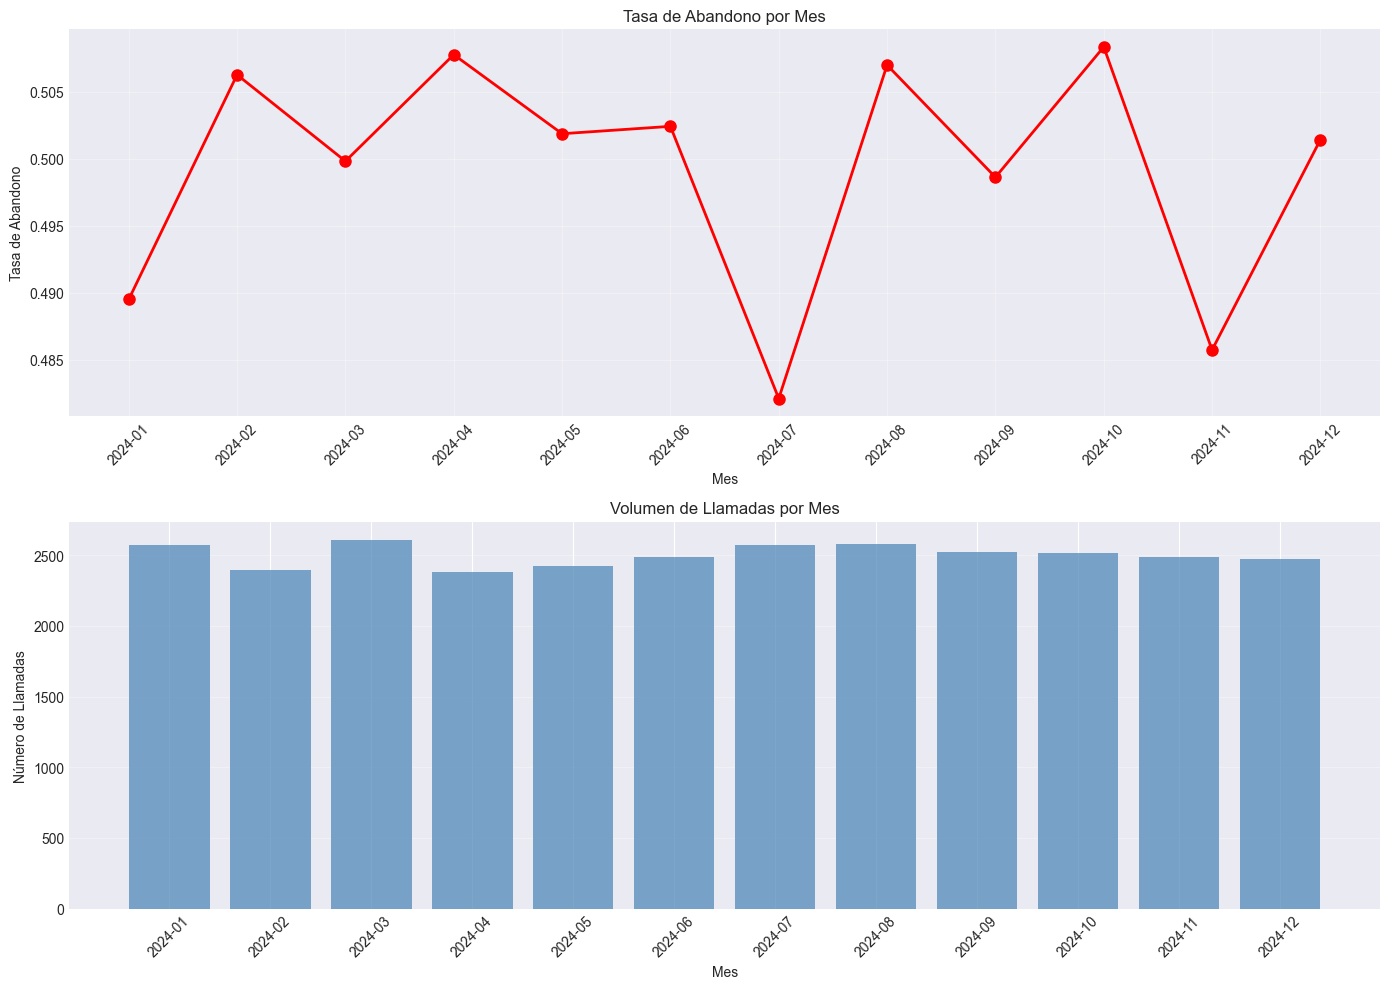

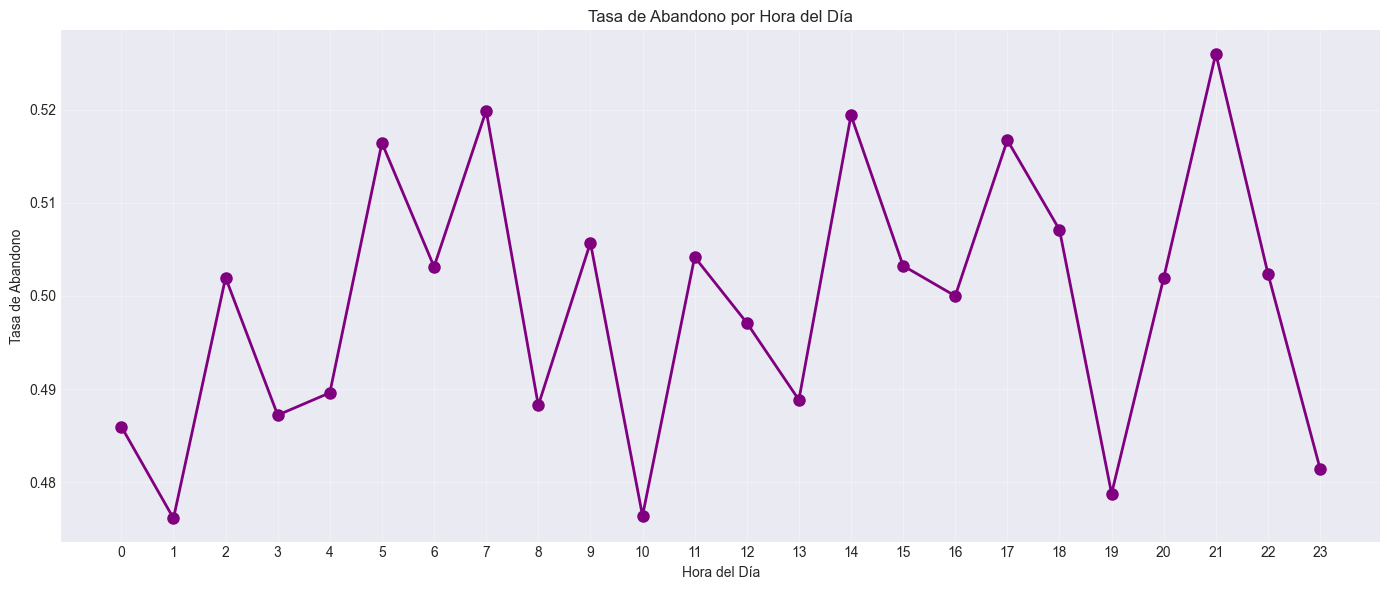

In [19]:
# Convertir call_time a datetime si no lo es
if 'call_time' in df.columns:
    df['call_time'] = pd.to_datetime(df['call_time'], errors='coerce')
    
    # Abandono por mes
    df['mes'] = df['call_time'].dt.to_period('M')
    abandono_mensual = df.groupby('mes')['abandono'].agg(['mean', 'count'])
    
    fig, axes = plt.subplots(2, 1, figsize=(14, 10))
    
    # Tasa de abandono mensual
    axes[0].plot(abandono_mensual.index.astype(str), abandono_mensual['mean'], 
                marker='o', linewidth=2, markersize=8, color='red')
    axes[0].set_title('Tasa de Abandono por Mes')
    axes[0].set_xlabel('Mes')
    axes[0].set_ylabel('Tasa de Abandono')
    axes[0].tick_params(axis='x', rotation=45)
    axes[0].grid(True, alpha=0.3)
    
    # Volumen de llamadas mensual
    axes[1].bar(abandono_mensual.index.astype(str), abandono_mensual['count'], 
               color='steelblue', alpha=0.7)
    axes[1].set_title('Volumen de Llamadas por Mes')
    axes[1].set_xlabel('Mes')
    axes[1].set_ylabel('Número de Llamadas')
    axes[1].tick_params(axis='x', rotation=45)
    axes[1].grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()
    
    # Abandono por hora del día
    if 'hora_llamada' in df.columns:
        abandono_hora = df.groupby('hora_llamada')['abandono'].mean()
        
        plt.figure(figsize=(14, 6))
        plt.plot(abandono_hora.index, abandono_hora.values, marker='o', 
                linewidth=2, markersize=8, color='purple')
        plt.title('Tasa de Abandono por Hora del Día')
        plt.xlabel('Hora del Día')
        plt.ylabel('Tasa de Abandono')
        plt.xticks(range(0, 24))
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()


## 12. Detección de Outliers


In [20]:
# Detección de outliers usando IQR
print("\n🔍 Detección de Outliers (Método IQR):")
print("=" * 60)

outliers_summary = []

for col in key_numeric:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    n_outliers = len(outliers)
    pct_outliers = (n_outliers / len(df)) * 100
    
    outliers_summary.append({
        'Variable': col,
        'Outliers': n_outliers,
        'Porcentaje (%)': f'{pct_outliers:.2f}',
        'Límite Inferior': f'{lower_bound:.2f}',
        'Límite Superior': f'{upper_bound:.2f}'
    })

outliers_df = pd.DataFrame(outliers_summary)
print(outliers_df.to_string(index=False))



🔍 Detección de Outliers (Método IQR):
         Variable  Outliers Porcentaje (%) Límite Inferior Límite Superior
             edad        70           0.23            7.50           75.50
  ingreso_mensual      1065           3.55        -1001.96         7320.65
       saldo_mora      1406           4.69        -8225.74        18265.46
        dias_mora         0           0.00         -180.50          543.50
 score_crediticio        93           0.31          329.53          869.30
wait_time_seconds      1518           5.06         -164.05          368.35
 call_center_load        96           0.32            0.16            1.23


## 13. Análisis de Duplicados


In [21]:
# Verificar duplicados
n_duplicados = df.duplicated().sum()
print(f"\n🔍 Análisis de Duplicados:")
print(f"  Total de registros duplicados: {n_duplicados:,}")
print(f"  Porcentaje: {(n_duplicados/len(df)*100):.2f}%")

if n_duplicados > 0:
    print("\n⚠️ Se encontraron registros duplicados")
    print("\nPrimeros duplicados:")
    print(df[df.duplicated(keep=False)].head(10))
else:
    print("\n✅ No se encontraron registros duplicados")



🔍 Análisis de Duplicados:
  Total de registros duplicados: 0
  Porcentaje: 0.00%

✅ No se encontraron registros duplicados


## 14. Insights y Conclusiones del EDA


In [22]:
print("\n" + "="*70)
print("📊 INSIGHTS PRINCIPALES DEL ANÁLISIS EXPLORATORIO")
print("="*70)

print("\n1. RESUMEN DEL DATASET:")
print(f"   • Total de registros: {len(df):,}")
print(f"   • Total de features: {len(df.columns)}")
print(f"   • Variables numéricas: {len(numeric_cols)}")
print(f"   • Variables categóricas: {len(categorical_cols)}")

print("\n2. VARIABLE TARGET:")
target_balance = abs(target_percent[0] - target_percent[1])
print(f"   • Distribución: {target_percent[0]:.1f}% No Abandono, {target_percent[1]:.1f}% Abandono")
print(f"   • Balance: {'Balanceado' if target_balance < 20 else 'Desbalanceado (requiere técnicas de balanceo)'}")

print("\n3. VALORES FALTANTES:")
total_missing = df.isnull().sum().sum()
if total_missing > 0:
    print(f"   • Total de valores faltantes: {total_missing:,}")
    if len(missing_df) > 0:
        print(f"   • Columnas afectadas: {len(missing_df)}")
else:
    print("   • No se encontraron valores faltantes")

print("\n4. VARIABLES MÁS CORRELACIONADAS CON ABANDONO:")
top_corr = target_corr.abs().sort_values(ascending=False).head(5)
for var, corr in top_corr.items():
    print(f"   • {var}: {corr:.3f}")

print("\n5. RECOMENDACIONES PARA PREPARACIÓN DE DATOS:")
print("   • Aplicar imputación para valores faltantes")
print("   • Manejar outliers usando winsorizing o transformaciones")
print("   • Considerar feature engineering basado en correlaciones")
print("   • Validar calidad de datos antes del modelado")
print("   • Usar división temporal para train/val/test")

print("\n" + "="*70)



📊 INSIGHTS PRINCIPALES DEL ANÁLISIS EXPLORATORIO

1. RESUMEN DEL DATASET:
   • Total de registros: 30,000
   • Total de features: 25
   • Variables numéricas: 13
   • Variables categóricas: 11

2. VARIABLE TARGET:
   • Distribución: 50.1% No Abandono, 49.9% Abandono
   • Balance: Balanceado

3. VALORES FALTANTES:
   • Total de valores faltantes: 4,500
   • Columnas afectadas: 3

4. VARIABLES MÁS CORRELACIONADAS CON ABANDONO:
   • abandono: 1.000
   • dias_mora: 0.242
   • score_crediticio: 0.209
   • call_center_load: 0.200
   • saldo_mora: 0.090

5. RECOMENDACIONES PARA PREPARACIÓN DE DATOS:
   • Aplicar imputación para valores faltantes
   • Manejar outliers usando winsorizing o transformaciones
   • Considerar feature engineering basado en correlaciones
   • Validar calidad de datos antes del modelado
   • Usar división temporal para train/val/test



## 15. Guardar Resumen del EDA


In [23]:
# Crear resumen ejecutivo
eda_summary = {
    'total_registros': len(df),
    'total_features': len(df.columns),
    'variables_numericas': len(numeric_cols),
    'variables_categoricas': len(categorical_cols),
    'tasa_abandono': target_percent[1],
    'valores_faltantes': total_missing,
    'duplicados': n_duplicados,
    'top_correlaciones': top_corr.to_dict()
}

print("\n✅ Resumen del EDA generado")
print("\nEste notebook puede ser ejecutado para reproducir el análisis exploratorio completo.")



✅ Resumen del EDA generado

Este notebook puede ser ejecutado para reproducir el análisis exploratorio completo.
